In [166]:
import pandas as pd
import numpy as np

In [167]:
df = pd.read_csv("final_clean_data.csv")

C:\Users\admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [168]:
df = df.drop('for_sale', 1)
df = df.drop('description', 1)
df

,price(€),monthly(€),energy_performance_diagnosis_(kWhEP/m².year),Greenhouse_gas_emission(kgeqCO2/m².year),terrace,view,area(m²),room,bedroom,year_of_construction,...,ZAC Saint Sebastien,Zone Agricole,Zone Industrielle,Zone Industrielle du Prat,Zone Nord Est Urbaine,Zone Ouest Urbaine,Zone Pavillonnaire,Zone Pietonne,Zone Rurale Nord,Île de Nantes
0,165000,689,239.0,0.0,1,0,39.63,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,230000,957,318.0,10.0,0,0,64.00,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,760000,3141,0.0,0.0,1,0,254.00,7,5,1982,...,0,0,0,0,0,0,0,0,0,0
3,349000,1447,131.0,30.0,0,0,82.00,4,2,1990,...,0,0,0,0,0,0,0,0,0,0
4,365000,1513,109.0,29.0,0,0,260.00,10,5,1900,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,148000,619,216.0,11.0,1,0,127.00,5,4,1988,...,0,0,0,0,0,0,0,0,0,0
1923,75240,317,305.0,0.0,0,0,140.00,5,2,1600,...,0,0,0,0,0,0,0,0,0,0
1924,375000,1554,167.0,7.0,1,0,72.45,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1925,520000,2152,125.0,3.0,1,0,110.00,4,3,2007,...,0,0,0,0,0,0,0,0,0,0


In [169]:
df['price(€)'] = df['price(€)'].astype('str')
df['price(€)'] = df['price(€)'].str.replace('\xa0','')
df['monthly(€)'] = df['monthly(€)'].astype('str')
df['monthly(€)'] = df['monthly(€)'].str.replace('\xa0','')

In [170]:
for i in range (df.shape[0]):
    df.loc[i, "price(€)"] = int(df["price(€)"].iloc[i])
    df.loc[i, "monthly(€)"] = int(df["monthly(€)"].iloc[i])

In [171]:
df[~df.applymap(np.isreal).all(1)]

,price(€),monthly(€),energy_performance_diagnosis_(kWhEP/m².year),Greenhouse_gas_emission(kgeqCO2/m².year),terrace,view,area(m²),room,bedroom,year_of_construction,...,ZAC Saint Sebastien,Zone Agricole,Zone Industrielle,Zone Industrielle du Prat,Zone Nord Est Urbaine,Zone Ouest Urbaine,Zone Pavillonnaire,Zone Pietonne,Zone Rurale Nord,Île de Nantes


In [172]:
y1_price = pd.DataFrame(np.log(df['price(€)']))
y2_monthly = pd.DataFrame(np.log(df['monthly(€)']))
df = df.drop('price(€)', 1)
df = df.drop('monthly(€)', 1)
x = pd.DataFrame(df)
y1_price

,price(€)
0,12.013701
1,12.345835
2,13.541074
3,12.762827
4,12.807653
...,...
1922,11.904968
1923,11.228438
1924,12.834681
1925,13.161584


<h1>Prediction of the prices</h1>

<h2>Linear Regression</h2>

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [174]:
print(model.score(X_train, Y_train_price))

0.9350959634936323


<h2>Random Forest Regressor</h2>

In [175]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [176]:
print(model.score(X_train, Y_train_price))

0.8971398285925247


<h2>Decision Tree Regressor</h2>

In [177]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [178]:
print(model.score(X_train, Y_train_price))

0.999999999785137


<h2>Regression using Keras</h2>

In [185]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Train on 1232 samples, validate on 309 samples
Epoch 1/100
1232/1232 [==============================] - 2s 2ms/step - loss: 694.1338 - accuracy: 0.0000e+00 - val_loss: 49.6692 - val_accuracy: 0.0000e+00
Epoch 2/100
1232/1232 [==============================] - 2s 2ms/step - loss: 90.0159 - accuracy: 0.0000e+00 - val_loss: 11.4718 - val_accuracy: 0.0000e+00
Epoch 3/100
1232/1232 [==============================] - 2s 2ms/step - loss: 135.3985 - accuracy: 0.0000e+00 - val_loss: 13.3615 - val_accuracy: 0.0000e+00
Epoch 4/100
1232/1232 [==============================] - 2s 2ms/step - loss: 26.4834 - accuracy: 0.0000e+00 - val_loss: 9.0127 - val_accuracy: 0.0000e+00
Epoch 5/100
1232/1232 [==============================] - 2s 2ms/step - loss: 25.9621 - accuracy: 0.0000e+00 - val_loss: 10.8039 - val_accuracy: 0.0000e+00
Epoch 6/100
1232/1232 [==============================] - 2s 2ms/step - loss: 10.0052 - accuracy: 0.0000e+00 - val_loss: 12.7818 - val_accuracy: 0.0000e+00
Epoch 7/100
1232/1232 

Epoch 54/100
1232/1232 [==============================] - 2s 2ms/step - loss: 0.4395 - accuracy: 0.0000e+00 - val_loss: 0.3885 - val_accuracy: 0.0000e+00
Epoch 55/100
1232/1232 [==============================] - 2s 2ms/step - loss: 0.4345 - accuracy: 0.0000e+00 - val_loss: 0.4033 - val_accuracy: 0.0000e+00
Epoch 56/100
1232/1232 [==============================] - 2s 2ms/step - loss: 0.7270 - accuracy: 0.0000e+00 - val_loss: 0.4080 - val_accuracy: 0.0000e+00
Epoch 57/100
1232/1232 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.0000e+00 - val_loss: 0.3653 - val_accuracy: 0.0000e+00
Epoch 58/100
1232/1232 [==============================] - 2s 2ms/step - loss: 0.4964 - accuracy: 0.0000e+00 - val_loss: 0.3696 - val_accuracy: 0.0000e+00
Epoch 59/100
1232/1232 [==============================] - 2s 2ms/step - loss: 0.4091 - accuracy: 0.0000e+00 - val_loss: 0.4012 - val_accuracy: 0.0000e+00
Epoch 60/100
1232/1232 [==============================] - 2s 2ms/step - loss

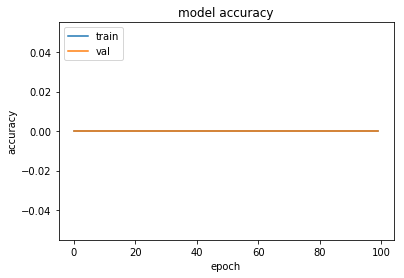

In [186]:
history = model.fit(X_train, Y_train_price,validation_split = 0.2, epochs=100, batch_size=5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

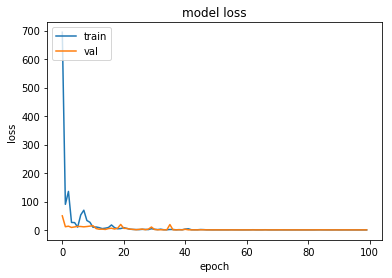

In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<h1>Prediction of the monthly prices</h1>

<h2>Linear Regression</h2>

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [191]:
print(model.score(X_train, Y_train_monthly))

0.9553175594261852


<h2>Random Forest Regressor</h2>

In [192]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [193]:
print(model.score(X_train, Y_train_monthly))

0.8993355199864238


<h2>Decision Tree Regressor</h2>

In [194]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [195]:
print(model.score(X_train, Y_train_monthly))

1.0


<h2>Regression using Keras</h2>

In [196]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Train on 1232 samples, validate on 309 samples
Epoch 1/6
1232/1232 [==============================] - 2s 2ms/step - loss: 0.1694 - accuracy: 0.0000e+00 - val_loss: 0.3097 - val_accuracy: 0.0000e+00
Epoch 2/6
1232/1232 [==============================] - 2s 2ms/step - loss: 0.1802 - accuracy: 0.0000e+00 - val_loss: 0.2984 - val_accuracy: 0.0000e+00
Epoch 3/6
1232/1232 [==============================] - 2s 2ms/step - loss: 0.1466 - accuracy: 0.0000e+00 - val_loss: 0.2923 - val_accuracy: 0.0000e+00
Epoch 4/6
1232/1232 [==============================] - 2s 2ms/step - loss: 0.1694 - accuracy: 0.0000e+00 - val_loss: 0.3436 - val_accuracy: 0.0000e+00
Epoch 5/6
1232/1232 [==============================] - 2s 2ms/step - loss: 0.1634 - accuracy: 0.0000e+00 - val_loss: 0.3133 - val_accuracy: 0.0000e+00
Epoch 6/6
1232/1232 [==============================] - 2s 2ms/step - loss: 0.1609 - accuracy: 0.0000e+00 - val_loss: 0.2790 - val_accuracy: 0.0000e+00


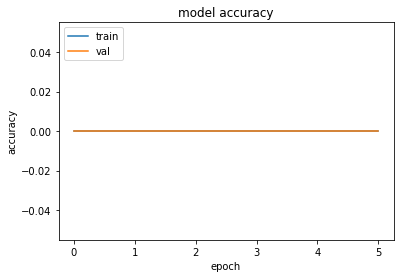

In [201]:
history = model.fit(X_train, Y_train_monthly,validation_split = 0.2, epochs=6, batch_size=5)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

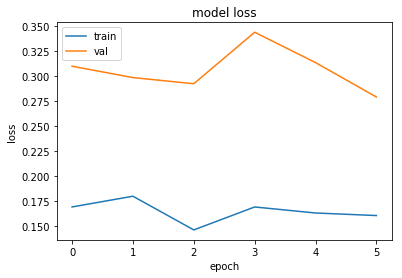

In [202]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()